# AirBnB Rental Price Prediction Project

### Context of the project:
...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Dataset

Data Dicitonary available in the following table: https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit#gid=1967362979

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv')

/var/folders/s4/67mds2cx77j5lthp_x3dx4dw0000gn/T/ipykernel_19532/2167922700.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


## Exploratory Data Analysis

In [3]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

### Names of Columns

In [4]:
# replace spaces with underscores in all column names
df.columns = df.columns.str.replace(' ', '_')

# lower case all column names
df.columns = df.columns.str.lower()

### Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

String --> Numeric

String --> datetime

In [6]:
df.price = df.price.str.replace('$', '').str.strip().str.replace(',', '').astype(float)

In [7]:
df.service_fee = df.service_fee.str.replace('$', '').str.strip().str.replace(',', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
df.last_review = pd.to_datetime(df.last_review)

### Missing values

In [10]:
# missing vlaues
df.isnull().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            406
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [11]:
df.drop('license', axis=1, inplace=True)

### Numeric Variables 

In [12]:
# select only numeric variables

df_num = df.select_dtypes(include=[np.number])

In [13]:
df_num.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Detected Anomalies: 
1. Minimum Nights columns:
- Presence of negative values
- Presence of extreme values (5645 as a number of minimum rental nights)
2. Reviews_per_month:
- Presence of extreme values (maximum number of reviews per month is 90, while mean is 1.37, also 90 reviews per month do not make logical sense)
3. Availability_365
- Presence of negative values (-10 as a min value of the column)
- Presence of Extreme values (e.g. 3677 days of availability per year)


In [14]:
df_num.median()

id                                2.913660e+07
host_id                           4.911774e+10
lat                               4.072229e+01
long                             -7.395444e+01
construction_year                 2.012000e+03
price                             6.240000e+02
service_fee                       1.250000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 7.000000e+00
reviews_per_month                 7.400000e-01
review_rate_number                3.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  9.600000e+01
dtype: float64

In [15]:
print(df[df.minimum_nights < 0].minimum_nights.to_list())

[-10.0, -5.0, -1.0, -10.0, -12.0, -2.0, -3.0, -1223.0, -365.0, -200.0, -125.0, -10.0, -10.0]


In [16]:
# Minimum Nights Column
df.minimum_nights = df.minimum_nights.abs()

In [17]:
pd.qcut(df.minimum_nights, q=4).value_counts()

minimum_nights
(0.999, 2.0]     49027
(5.0, 5645.0]    24372
(2.0, 3.0]       16114
(3.0, 5.0]       12677
Name: count, dtype: int64

In [18]:
df[df.minimum_nights > 365][['name', 'minimum_nights', 'price']]

,name,minimum_nights,price
167,Convenient cozy cheap apt Manhattan,371.0,375.0
186,SAFE AND BEAUTIFUL ACCOMODATION,366.0,946.0
263,"Private, Large & Sunny Top Floor Apt w/W&D",399.0,841.0
299,Bright Beautiful Brooklyn,452.0,614.0
350,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,3455.0,1142.0
473,Spacious Quiet rm - 20mins to Midtown,398.0,409.0
1306,800sqft apartment with huge terrace,370.0,1179.0
2855,NaN,1000.0,198.0
5768,Prime W. Village location 1 bdrm,1250.0,379.0
7356,Beautiful Fully Furnished 1 bed/bth,500.0,129.0


##### Cut the minimum nights for max 30 days

In [19]:
# Reviews Per Month

# detect outliers in reviews_per_month with z-score method

u = df.reviews_per_month.mean()
s = df.reviews_per_month.std()

df['z_score_reviews_per_month'] = (df.reviews_per_month - u) / s

df[df.z_score_reviews_per_month.abs() > 3][['name', 'reviews_per_month', 'minimum_nights']]


,name,reviews_per_month,minimum_nights
472,LG Private Room/Family Friendly,6.70,NaN
535,Hospitality on Propsect Pk-12 yrs Hosting Lega...,6.62,1.0
554,Modern Condo in Midtown,7.14,NaN
1615,Centrally located and spacious apt.,10.00,7.0
1628,Beautiful duplex loft with Skylight,10.00,14.0
...,...,...,...
102338,Private Bedroom Free parking 10 min to Manhattan,8.56,1.0
102344,LARGE Private Room next to the Empire State,7.24,1.0
102345,Cozy corner near Empire State Building,10.77,1.0
102361,"Private Room Midtown Park Avenue, Steal!",7.61,1.0


6.62
reviews_per_month
(7.135, 7.86]     280
(6.619, 7.135]    279
(9.295, 90.0]     279
(7.86, 9.295]     277
Name: count, dtype: int64


<Axes: >

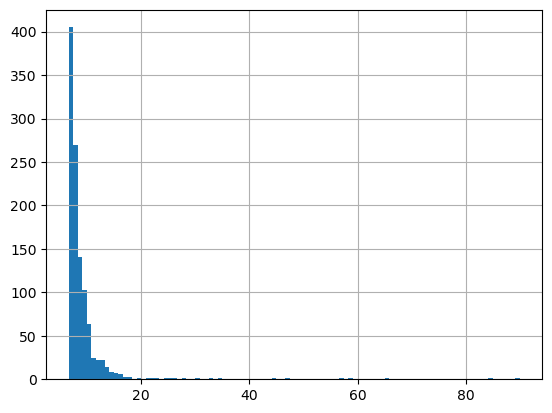

In [20]:
print(df[df.z_score_reviews_per_month.abs() > 3].reviews_per_month.min())

print(pd.qcut(df[df.z_score_reviews_per_month.abs() > 3].reviews_per_month, q=4).value_counts())

df[df.z_score_reviews_per_month.abs() > 3].reviews_per_month.hist(bins=100)

In [21]:
## Availability 365 Column - negative values & extreme values

df[df.availability_365 < 0].availability_365.value_counts()

availability_365
-5.0     58
-8.0     50
-9.0     47
-1.0     45
-2.0     43
-3.0     43
-4.0     41
-10.0    37
-7.0     36
-6.0     32
Name: count, dtype: int64

In [15]:
df.loc[df.availability_365 < 0, 'availability_365'] = 0

In [16]:
df.loc[df.availability_365 > 365, 'availability_365'] = 365

<Axes: >

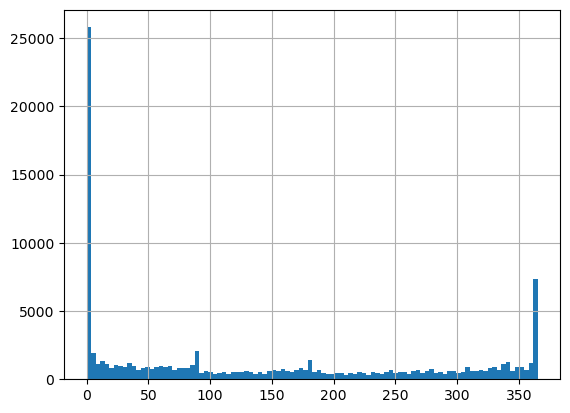

In [24]:
df.availability_365.hist(bins=100)

In [25]:
df.drop('z_score_reviews_per_month', axis=1, inplace=True)  

#### Distribution of Numeric Variables

In [26]:
df_num = df.select_dtypes(include=[np.number])

/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kuba/opt/anaconda3/envs/nova-3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

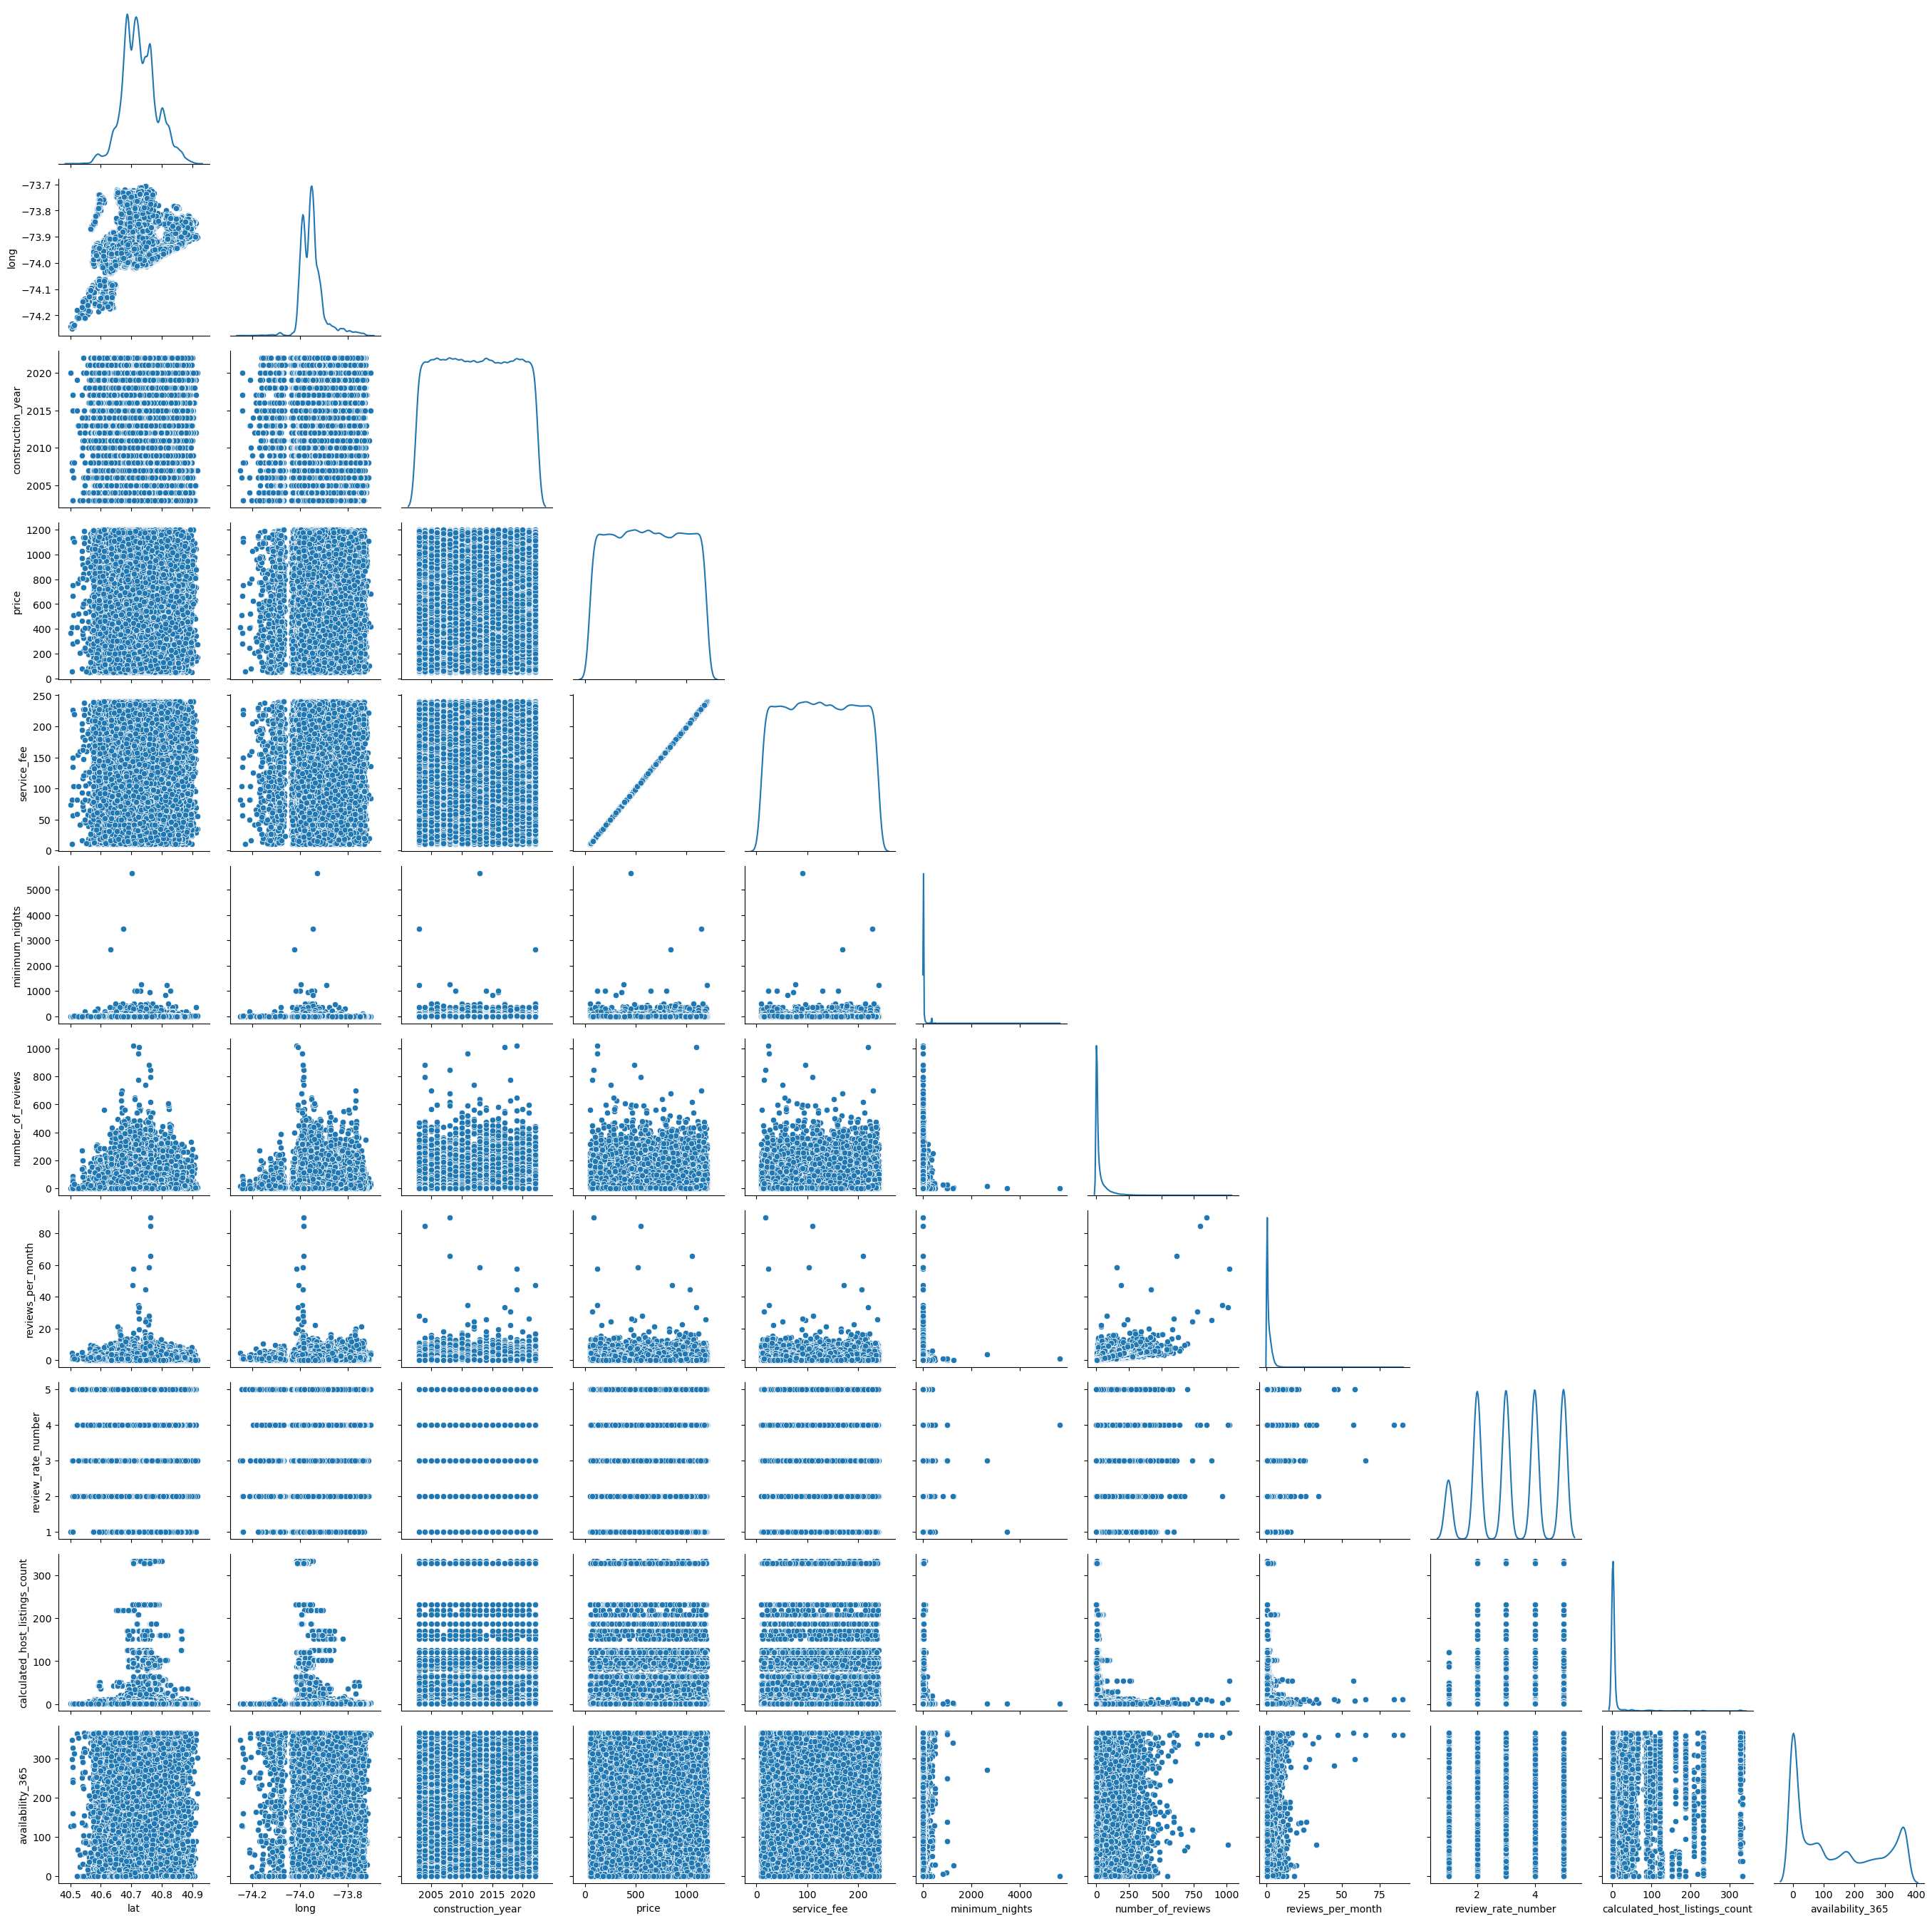

In [27]:
g = sns.PairGrid(df_num.drop(['id', 'host_id'], axis=1), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

#### Correlation between numeric variables

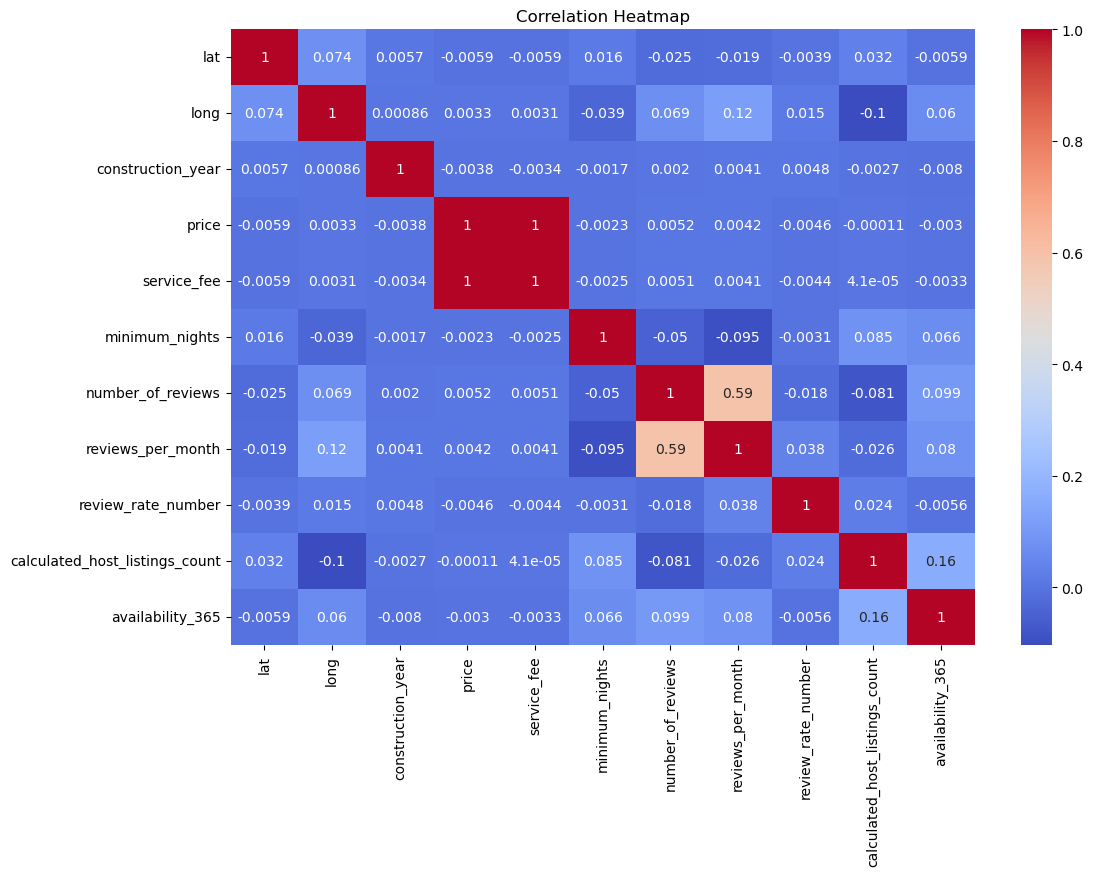

In [28]:
# correlation heatmap plotbetween all numeric vsariables

plt.figure(figsize=(12, 8))

sns.heatmap(df_num.drop(['id', 'host_id'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

### Categorical variables

In [26]:
# df with categorical variables

df_cat = df.select_dtypes(include=[object]).drop(['name', 'host_name', 'house_rules'], axis=1)

In [27]:
# unique values in each categorical column

for col in df_cat.columns:
    print(f'{col} unique values: {df_cat[col].nunique()}')

host_identity_verified unique values: 2
neighbourhood_group unique values: 7
neighbourhood unique values: 224
country unique values: 1
country_code unique values: 1
instant_bookable unique values: 2
cancellation_policy unique values: 3
room_type unique values: 4


In [28]:
for col in df_cat.drop('neighbourhood', axis=1).columns:
    print(f'{df_cat[col].value_counts()}')
    print(f'{"-"*50}')

host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64
--------------------------------------------------
neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64
--------------------------------------------------
country
United States    102067
Name: count, dtype: int64
--------------------------------------------------
country_code
US    102468
Name: count, dtype: int64
--------------------------------------------------
instant_bookable
False    51474
True     51020
Name: count, dtype: int64
--------------------------------------------------
cancellation_policy
moderate    34343
strict      34106
flexible    34074
Name: count, dtype: int64
--------------------------------------------------
room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Nam

In [29]:
# clean neighbourhood_group column by mapping 'brookln' to 'Brooklyn' and 'manhatan' to 'Manhattan'

df_cat.neighbourhood_group = df_cat.neighbourhood_group.apply(lambda x: 'Brooklyn' if x == 'brookln' else x)
df_cat.neighbourhood_group = df_cat.neighbourhood_group.apply(lambda x: 'Manhattan' if x == 'manhatan' else x)

In [30]:
df.neighbourhood_group = df.neighbourhood_group.apply(lambda x: 'Brooklyn' if x == 'brookln' else x)
df.neighbourhood_group = df.neighbourhood_group.apply(lambda x: 'Manhattan' if x == 'manhatan' else x)

In [31]:
# we can drop country an country_code columns as they have only one unique value
# dropping in both df and df_cat

df.drop(['country', 'country_code'], axis=1, inplace=True)
df_cat.drop(['country', 'country_code'], axis=1, inplace=True)

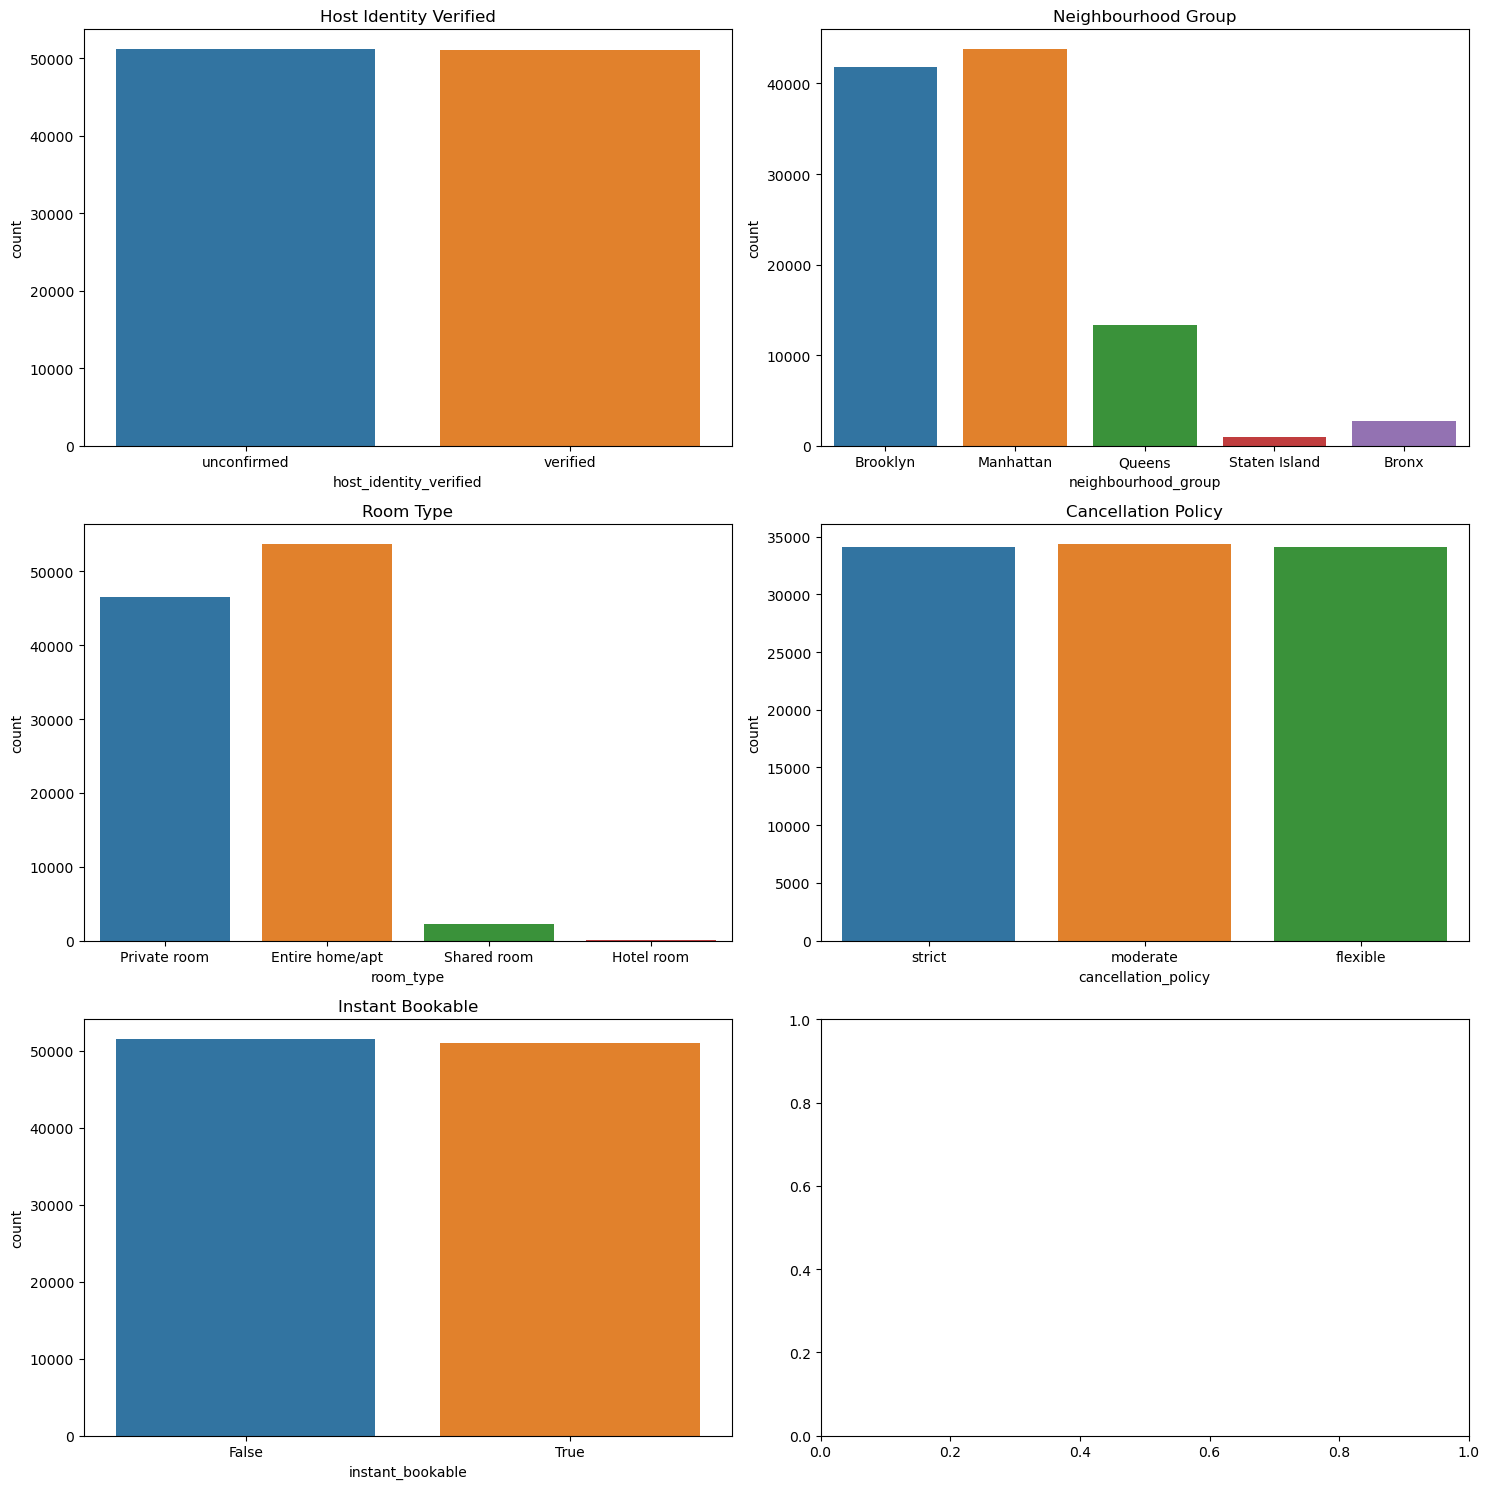

In [32]:
# distributoin of host_identity_verified, neighbourhood_group, 'room_type', 'instant_bookable', 'cancellation_policy'

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(x='host_identity_verified', data=df_cat, ax=axes[0, 0])
axes[0, 0].set_title('Host Identity Verified')

sns.countplot(x='neighbourhood_group', data=df_cat, ax=axes[0, 1])
axes[0, 1].set_title('Neighbourhood Group')

sns.countplot(x='room_type', data=df_cat, ax=axes[1, 0])
axes[1, 0].set_title('Room Type')

sns.countplot(x='cancellation_policy', data=df_cat, ax=axes[1, 1])
axes[1, 1].set_title('Cancellation Policy')

sns.countplot(x='instant_bookable', data=df_cat, ax=axes[2, 0])
axes[2, 0].set_title('Instant Bookable')



plt.tight_layout()

plt.show()

### Text Columns

In [77]:
# text columns only

df_text = df[['name', 'host_name', 'house_rules']]

In [78]:
names = df_text.name.copy()

In [79]:
names = names.dropna()

In [80]:
names = names.str.lower()

In [81]:
# remove stopwords from names

from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

names = names.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# remove punctuation from names

names = names.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [82]:
# find most frequent words, bi-grams and tri-grams in names (separately) -- absolute frequencies

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_grams(data = pd.Series, ngram_range = (1, 1), n = 10):
    cv = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    cv.fit(data)
    data_cv = cv.transform(data)
    data_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
    return data_cv.sum().sort_values(ascending=False).head(n)

# words
names_cv_1 = get_top_n_grams(names, ngram_range=(1, 1), n=10)

names_cv_1


room         21306
bedroom      16150
private      15589
apartment    14106
cozy         10594
apt           9381
studio        8675
brooklyn      8634
spacious      7589
manhattan     7196
dtype: int64

In [83]:
# bi-grams
names_cv_2 = get_top_n_grams(names, ngram_range=(2, 2), n=10)

names_cv_2

private room         5993
central park         2649
east village         2370
private bedroom      2066
bedroom apartment    1867
cozy room            1806
upper east           1339
times square         1282
new york             1269
bedroom apt          1223
dtype: int64

In [84]:
# tri-grams
names_cv_3 = get_top_n_grams(names, ngram_range=(3, 3), n=10)

names_cv_3

near central park        634
cozy private room        535
home away home           530
new york city            322
room private bathroom    305
private room near        286
near prospect park       272
sonder stock exchange    261
spacious private room    238
heart east village       234
dtype: int64

In [85]:
# find most important words, bi-grams and tri-grams in names (separately) -- tf-idf scores
# for each document, exrtract only top 1 n-gram according to TF-IDF score
# for each n-gram calculate the number of documents it appears as top 1 n-gram (with the highsst TF-IDF score)

from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_analysis(data, ngram_range=(1, 1), stop_words='english'):
    tfidf = TfidfVectorizer(ngram_range=ngram_range, stop_words=stop_words)
    tfidf.fit(data)
    data_tfidf = tfidf.transform(data)
    data_tfidf = pd.DataFrame(data_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    data_tfidf = data_tfidf.idxmax(axis=1).value_counts()
    return data_tfidf

# words
names_tfidf_1 = tfidf_analysis(names, ngram_range=(1, 1), stop_words='english')

names_tfidf_1.head(10)

upper           692
home            589
harlem          481
bushwick        456
prospect        409
williamsburg    391
greenpoint      390
village         390
beautiful       368
charming        368
Name: count, dtype: int64

In [86]:
# bi-grams
names_tfidf_2 = tfidf_analysis(names, ngram_range=(2, 2), stop_words='english')

names_tfidf_2.head(10)

: 

In [ ]:
# tri-grams
names_tfidf_3 = tfidf_analysis(names, ngram_range=(3, 3), stop_words='english')

names_tfidf_3.head(10)

001ll safe area                6235
home away home                  118
private room brooklyn            50
private room williamsburg        46
room heart williamsburg          35
private room upper               32
water view king                  30
beautiful bedroom apartment      29
new york multiunit               28
room near columbia               27
Name: count, dtype: int64

In [76]:
names

0                          Clean  quiet apt home park
1                               Skylit Midtown Castle
2                             VILLAGE HARLEMNEW YORK 
4         Entire Apt Spacious StudioLoft central park
5              Large Cozy 1 BR Apartment Midtown East
                             ...                     
102594                        Spare room Williamsburg
102595                  Best Location near Columbia U
102596                     Comfy bright room Brooklyn
102597                     Big StudioOne Stop Midtown
102598                           585 sf Luxury Studio
Name: name, Length: 102349, dtype: object

### Analysis of individual hosts

In [56]:
df.groupby('host_id').size().sort_values(ascending=False).value_counts()

1    101515
2       542
Name: count, dtype: int64

In [53]:
df.groupby('host_id')['calculated_host_listings_count'].max()

host_id
123600518       1.0
124039648       1.0
124472619       2.0
129756565       2.0
130349612       1.0
               ... 
98758136270    34.0
98760968631     1.0
98762661810     3.0
98762683230     1.0
98763129024     1.0
Name: calculated_host_listings_count, Length: 102057, dtype: float64

In [19]:
df.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1.0     63429
2.0     14445
3.0      6577
4.0      3552
5.0      1995
        ...  
86.0       21
22.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 78, dtype: int64

In [22]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

(0.0, 1100.0)

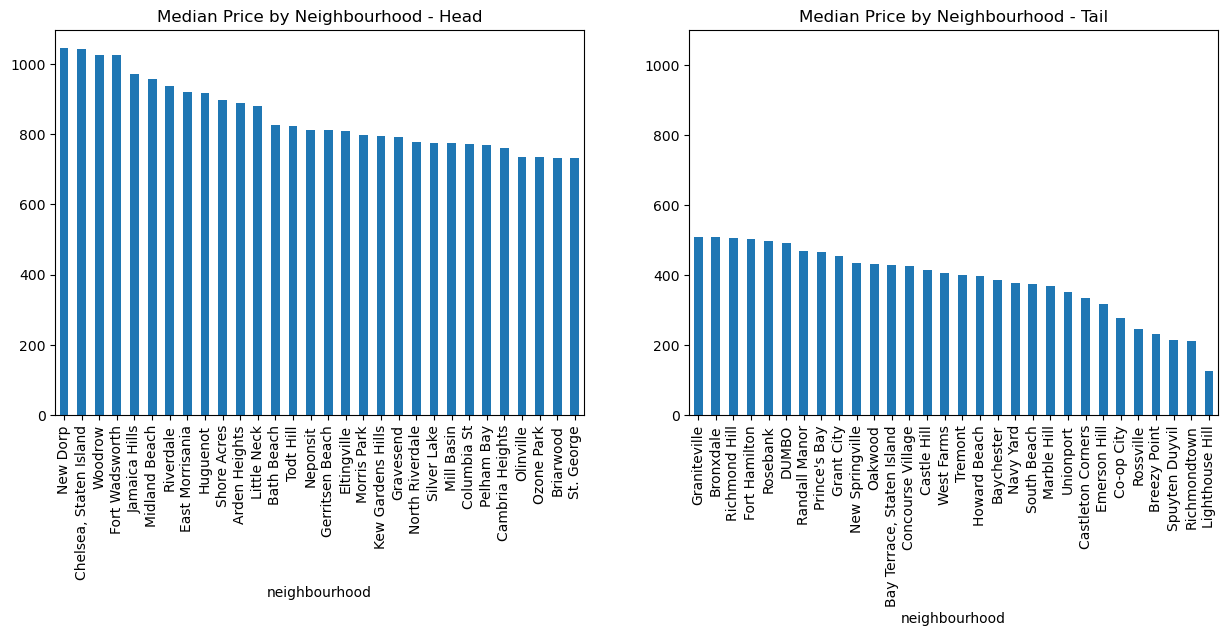

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(30).plot(kind='bar', ax=axes[0])
axes[0].set_title('Median Price by Neighbourhood - Head')

df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).tail(30).plot(kind='bar', ax=axes[1])
axes[1].set_title('Median Price by Neighbourhood - Tail')
plt.ylim(0, 1100)